<a href="https://colab.research.google.com/github/gks2022004/INDRA_MODEL/blob/main/cloud_burst_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We focus on the development of a Cloud Burst Forecasting(CBF) model using the
concept of the Artificial Neural Network (ANN) for the prediction of future chances of cloud bursting in India.

- For the pre-processing of the used dataset of rainfalls in proposed CBF model, Particle Swarm Optimization (PSO) is used with a novel fitness function for the separation of data into two part minimum and maximum
rainfalls.
- The concept of ANN is used as a classifier with the optimization algorithm to predict the cloud bursting in
India based on the previous time-series recorded data.
- At the Percentage Correct Prediction (PCP) and Percentage Incorrect Prediction (PIP) is calculated to verify
the responsiveness of proposed CBF model.
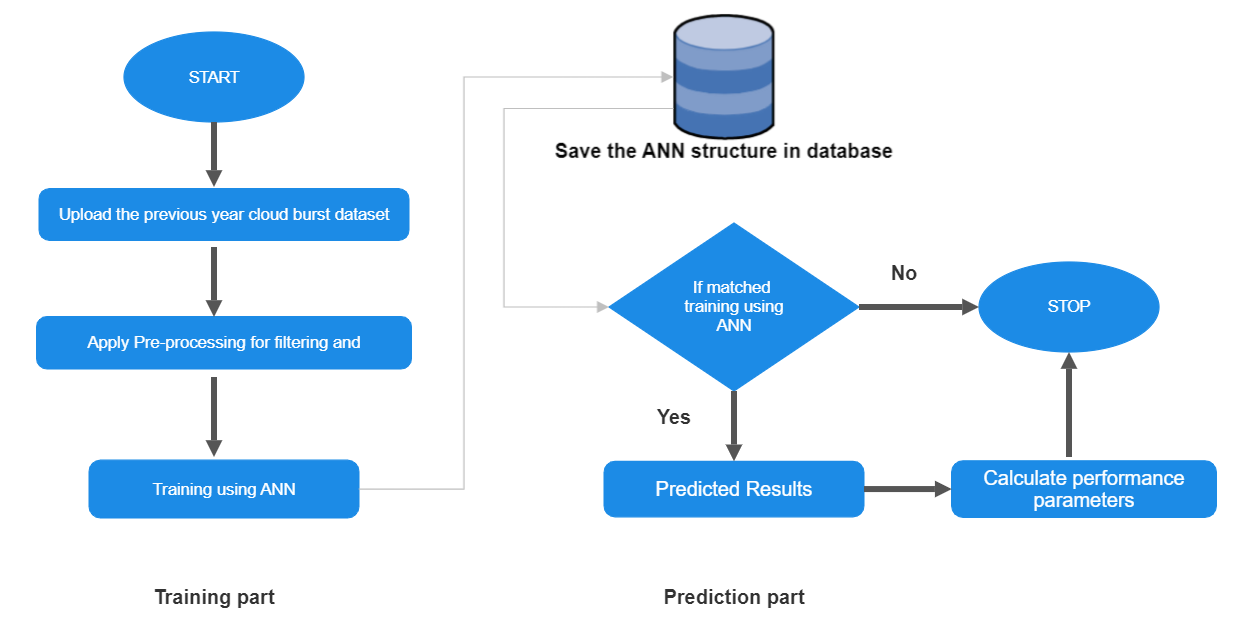

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd

# Load CSV
df = pd.read_csv('/content/open-meteo-32.30N75.10E269m.csv')

# Standardize column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Print columns
print(df.columns)

# Extract input features
X = df[['time','temperature_2m (掳C)','relativehumidity_2m (%)','precipitation (mm)','rain (mm)','surface_pressure (hPa)','cloudcover (%)','cloudcover_mid (%)','']]

# Target
y = df['precipitation (mm)']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Build RNN model
model = keras.Sequential()
model.add(layers.LSTM(64, input_shape=X_train[0].shape))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile and train
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train,
          epochs=100,
          validation_data=(X_test, y_test))

# Evaluate on test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy: {:.2f}".format(accuracy))

ParserError: ignored